In [195]:
import pandas as pd
from collections import Counter

In [196]:
sda1 = pd.read_excel(r'D:\coding\coding semester 1\coding semester 2\UAS\SDA 1.xlsx')

In [197]:
#CLASS MEMBANGUN TREENODE
class TreeNode:
    def __init__(self,nama = '', kondisi = None, jurusan = None):
        self.nama = nama
        self.kondisi = kondisi
        self.jurusan = jurusan
        self.anak = []
        
    def tambah_anak(self,Node):
        self.anak.append(Node)
        
    def cek_jurusan(self, skor_LP, skor_LB, skor_PU):
        hasil_jurusan = []
        if self.jurusan :
            return [self.jurusan]
        for anak in self.anak:
            if anak.kondisi is None or anak.kondisi(skor_LP, skor_LB, skor_PU):
                hasil_jurusan.extend(anak.cek_jurusan (skor_LP, skor_LB, skor_PU))
        return hasil_jurusan
            
            


In [198]:
# ALGORITMA SORTING UNTUK SLEKSI JURUSAN
def seleksi_jurusan_DT1(posisi_LP, posisi_LB,posisi_PU ,skor_LP, skor_LB ,skor_PU):
    if posisi_LP == 1 and skor_LP >= 650:
        return (posisi_LB == 2 and skor_LB >= 600 ) or (posisi_PU == 2 and skor_PU >= 600)
    elif posisi_LP == 2 and 500 <= skor_LP < 650:
        return (posisi_LB == 1 and skor_LB >= 600) or (posisi_PU == 1 and skor_PU < 600)
    elif posisi_LP == 3 and skor_LP < 500:
        return (posisi_LB == 1 and skor_LB >= 650 and posisi_PU == 2 and skor_PU >= 600) or (posisi_LB == 2 and skor_LB >= 600 and posisi_PU == 1 and skor_PU >650)
    return False

def seleksi_jurusan_DT2(posisi_LB, posisi_LP, posisi_PU, skor_LB, skor_LP, skor_PU):
    if posisi_LB == 1 and skor_LB >= 650:
        return (posisi_LP == 2 and skor_LP >= 600) or (posisi_PU == 2 and skor_PU >= 600)
    elif posisi_LB == 2 and 500 <= skor_LB < 650:
        return (posisi_LP == 1 and skor_LP >= 600) or (posisi_PU == 1 and skor_PU < 600)
    elif posisi_LB == 3 and skor_LB < 500:
        return (posisi_LP == 1 and skor_LP >= 650 and posisi_PU == 2 and skor_PU >= 600) or (posisi_LP == 2 and skor_LP >= 600 and posisi_PU == 1 and skor_PU > 650)
    return False

def seleksi_jurusan_DT3(posisi_PU, posisi_LB, posisi_LP, skor_PU, skor_LB, skor_LP):
    if posisi_PU == 1 and skor_PU >= 650:
        return (posisi_LB == 2 and skor_LB >= 600) or (posisi_LP == 2 and skor_LP >= 600)
    elif posisi_PU == 2 and 500 <= skor_PU < 650:
        return (posisi_LB == 1 and skor_LB >= 600) or (posisi_LP == 1 and skor_LP < 600)
    elif posisi_PU == 3 and skor_PU < 500:
        return (posisi_LB == 1 and skor_LB >= 650 and posisi_LP == 2 and skor_LP >= 600) or (posisi_LB == 2 and skor_LB >= 60 and posisi_LP == 1 and skor_LP >= 650)
    return False


In [199]:
#PASANG ROOT DAN MEMBUAT TREE
def build_treenode_DT(sda1,prio='LP'):
    root = TreeNode('root')
    for _, row in sda1.iterrows():
        prioritas = (row['prioritas 1'], row['prioritas 2'], row['prioritas 3'])
        if set(prioritas) != {'LP', 'LB', 'PU'}:
            continue
        
        posisi_LP = prioritas.index('LP') + 1
        posisi_LB = prioritas.index('LB') + 1
        posisi_PU = prioritas.index('PU') + 1
        
        def seleksi_jurusan(sp_LP, sp_LB, sp_PU, pLP=posisi_LP, pLB=posisi_LB, pPU=posisi_PU):
            if prio == 'LP':
                return seleksi_jurusan_DT1(pLP, pLB,pPU ,sp_LP, sp_LB ,sp_PU)
            elif prio == 'LB':
                return seleksi_jurusan_DT2(pLB, pLP, posisi_PU, sp_LB, sp_LP, sp_PU)
            elif prio == 'PU':
                return seleksi_jurusan_DT3(posisi_PU, pLB, pLP, sp_PU, sp_LB, sp_LP)
            return False
        jur_node = TreeNode(nama = row['Jurusan'],kondisi = seleksi_jurusan,jurusan = row['Jurusan'])
        root.tambah_anak(jur_node)
        
    return root
#GABUNG HASIL DAN SELEKSI MANA YANG DOBEL TERBANYAK    
def rekomendasi_jurusan(sda1, skor_LP, skor_LB, skor_PU):
    hasil_DT1 = build_treenode_DT(sda1,'LP'). cek_jurusan(skor_LP, skor_LB, skor_PU)
    hasil_DT2 = build_treenode_DT(sda1,'LB'). cek_jurusan(skor_LP, skor_LB, skor_PU)
    hasil_DT3 = build_treenode_DT(sda1,'PU'). cek_jurusan(skor_LP, skor_LB, skor_PU)
    
    gabungan = hasil_DT1 + hasil_DT2 + hasil_DT3
    counter = Counter(gabungan)   
    
    if counter :
        terbanyak = max(counter.values())
        rekomendasi_jurusan_final = [jurusan for jurusan,frekuensi in counter.items() if frekuensi == terbanyak]
        return rekomendasi_jurusan_final
    return []
       


In [200]:
#SELEKSI PTN BERDASARKAN NILAI RATA RATA  DAN PG
def seleksi_PTN(sda1, daftar_jurusan, nilai_total):
    hasil_ptn = {}
    for jurusan in daftar_jurusan:
        baris = sda1[sda1['Jurusan'] == jurusan]
        if not baris.empty:
            PTN = []
            for ptn in ['ITS', 'UNAIR', 'UB', 'UM', 'UNESA', 'UPNVJT']:
                pg = baris[ptn].values[0]
                if pd.notna(pg) and pg > 0 and nilai_total >= pg:
                    PTN.append(ptn)
            hasil_ptn[jurusan] = PTN
    return hasil_ptn

In [201]:
# nilai_PU = float(input("Masukkan nilai Pengetahuan Umum anda: "))
# nilai_PPU = float(input("Masukkan nilai Pengetahuan Pemahaman Umum anda: ")) 
# nilai_PBM = float(input("Masukkan nilai Pengetahuan Baca dan Menulis anda: ")) 
# nilai_PK = float(input("Masukkan nilai Pengetahuan Kuatitatif anda: ")) 
# nilai_LITBIN = float(input("Masukkan nilai Literasi dalam Bahasa Indonesiaanda: ")) 
# nilai_LITBING = float(input("Masukkan nilai Literasi Dalam Bahasa Inggris anda: ")) 
# nilai_PM = float(input("Masukkan nilai Penalaran Matematika  anda: ")) 

# skor_LB = (nilai_LITBIN + nilai_LITBING)/2
# skor_LP = (nilai_PK + nilai_PM)/2
# skor_PU = (nilai_PU + nilai_PPU + nilai_PBM)/3
    


In [202]:
# untuk debuging
skor_LB = 487
skor_LP = 499.5
skor_PU = 500.333333333333333

In [203]:
# semua jurusan ditampilkan
nilai_total = (skor_LP + skor_LB + skor_PU) / 3
hasil_akhir = rekomendasi_jurusan(sda1, skor_LP, skor_LB, skor_PU)
hasil_ptn = seleksi_PTN(sda1, hasil_akhir, nilai_total)

print(f"NILAI RATA-RATA = {nilai_total:.2f}")
print("Rekomendasi Jurusan dan PTN:")
for i,jurusan in enumerate(hasil_ptn,start = 1):
    print(f"{i}.{jurusan}")
    if jurusan in hasil_ptn and hasil_ptn[jurusan]:
        for ptn in hasil_ptn[jurusan]:
            print(f" -{ptn}")
    else:
        print("   (Tidak ada universitas yang memenuhi passing grade)")


NILAI RATA-RATA = 495.61
Rekomendasi Jurusan dan PTN:


In [204]:
#jurusan tanpa univ disembunyikan 
nilai_total = (skor_LP + skor_LB + skor_PU) / 3
hasil_akhir = rekomendasi_jurusan(sda1, skor_LP, skor_LB, skor_PU)
hasil_ptn = seleksi_PTN(sda1, hasil_akhir, nilai_total)

# Filter jurusan yang punya minimal 1 PTN lolos
hasil_ptn_filtered = {j: ptns for j, ptns in hasil_ptn.items() if ptns}

print(f"NILAI RATA-RATA = {nilai_total:.2f}")
if not hasil_ptn_filtered:
    print ("maaf nilaimu tidak dapat memenuhi pasing grade")
    print("tetap semangat dan jangan putus asa ")
else:
    print("Rekomendasi Jurusan dan PTN:")
    for i, (jurusan, daftar_ptn) in enumerate(hasil_ptn_filtered.items(), start= 1):
        print(f"{i}. {jurusan}")
        for ptn in daftar_ptn:
            print(f" - {ptn}")
                

NILAI RATA-RATA = 495.61
maaf nilaimu tidak dapat memenuhi pasing grade
tetap semangat dan jangan putus asa 


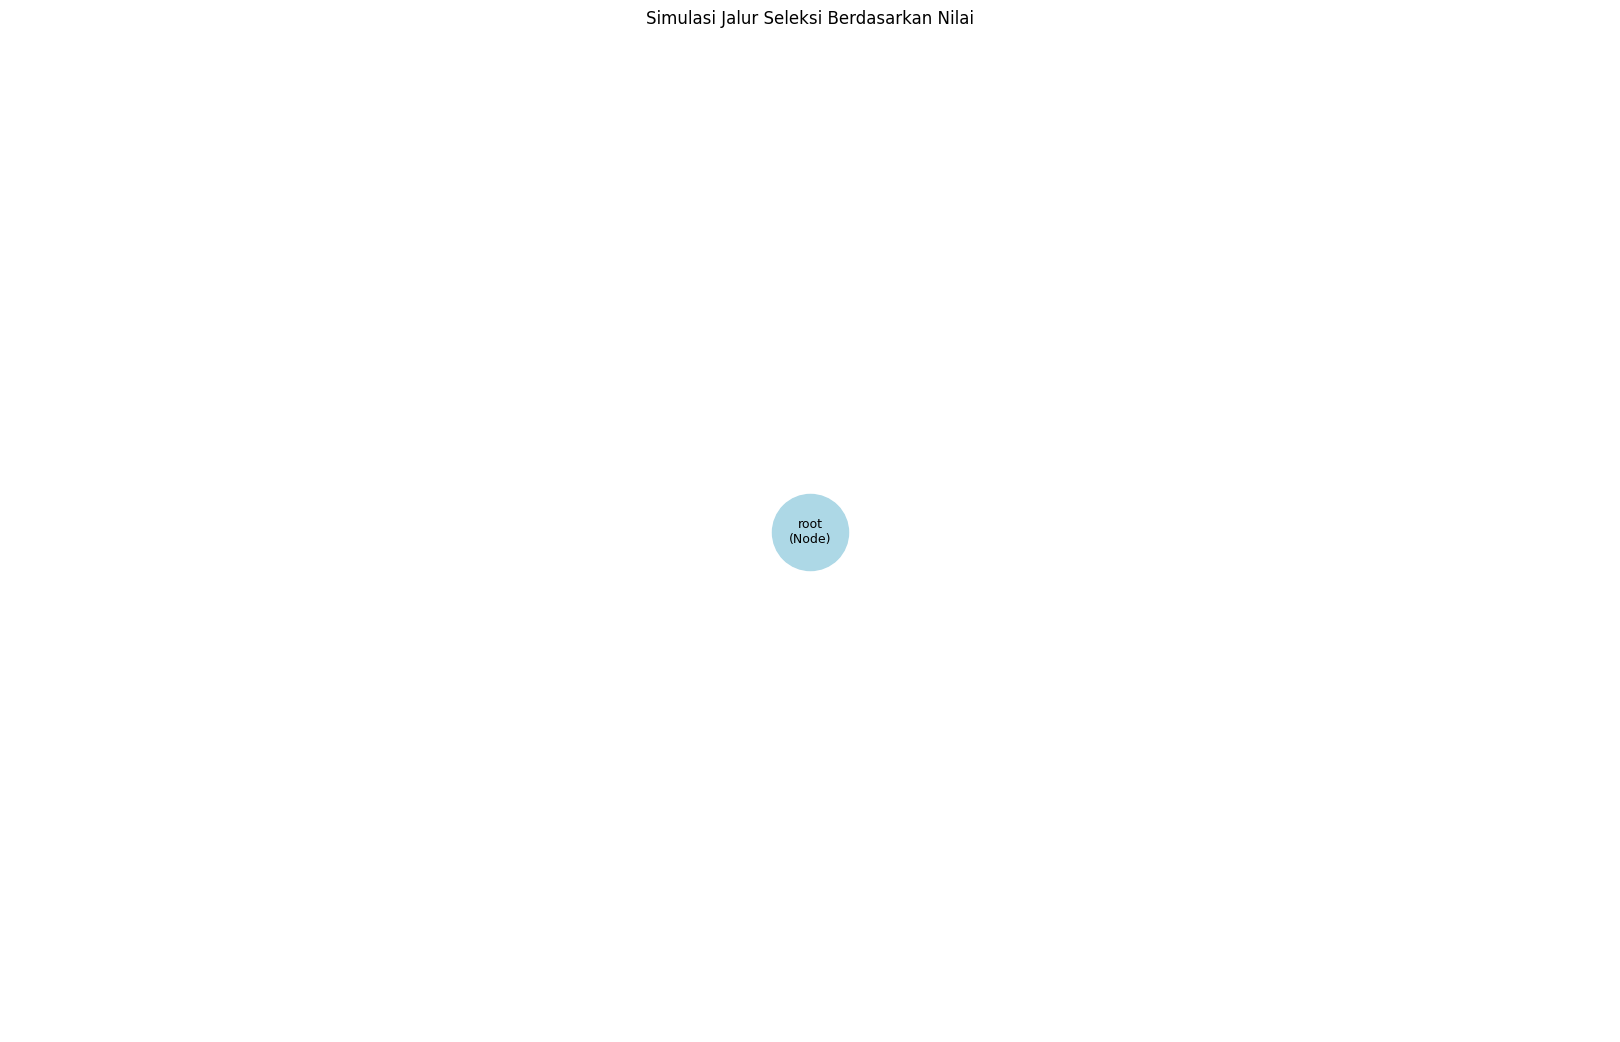


[SIMULASI JALUR TREE – PRIORITAS LP] None


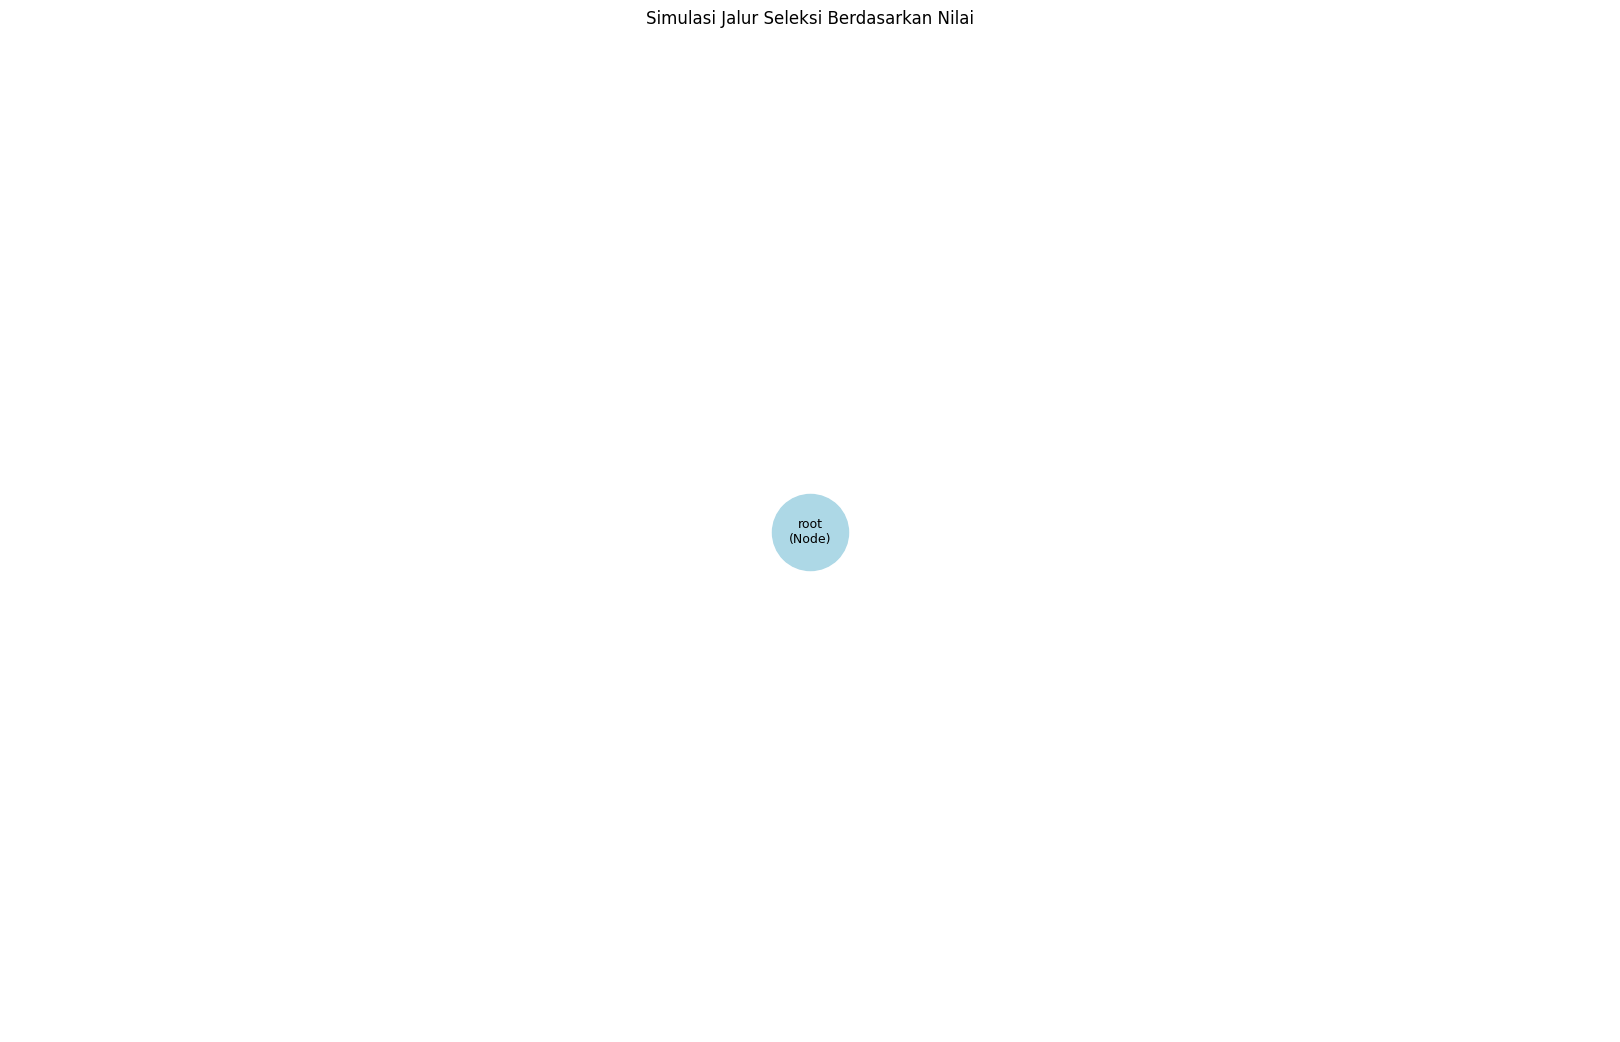


[SIMULASI JALUR TREE – PRIORITAS LB] None


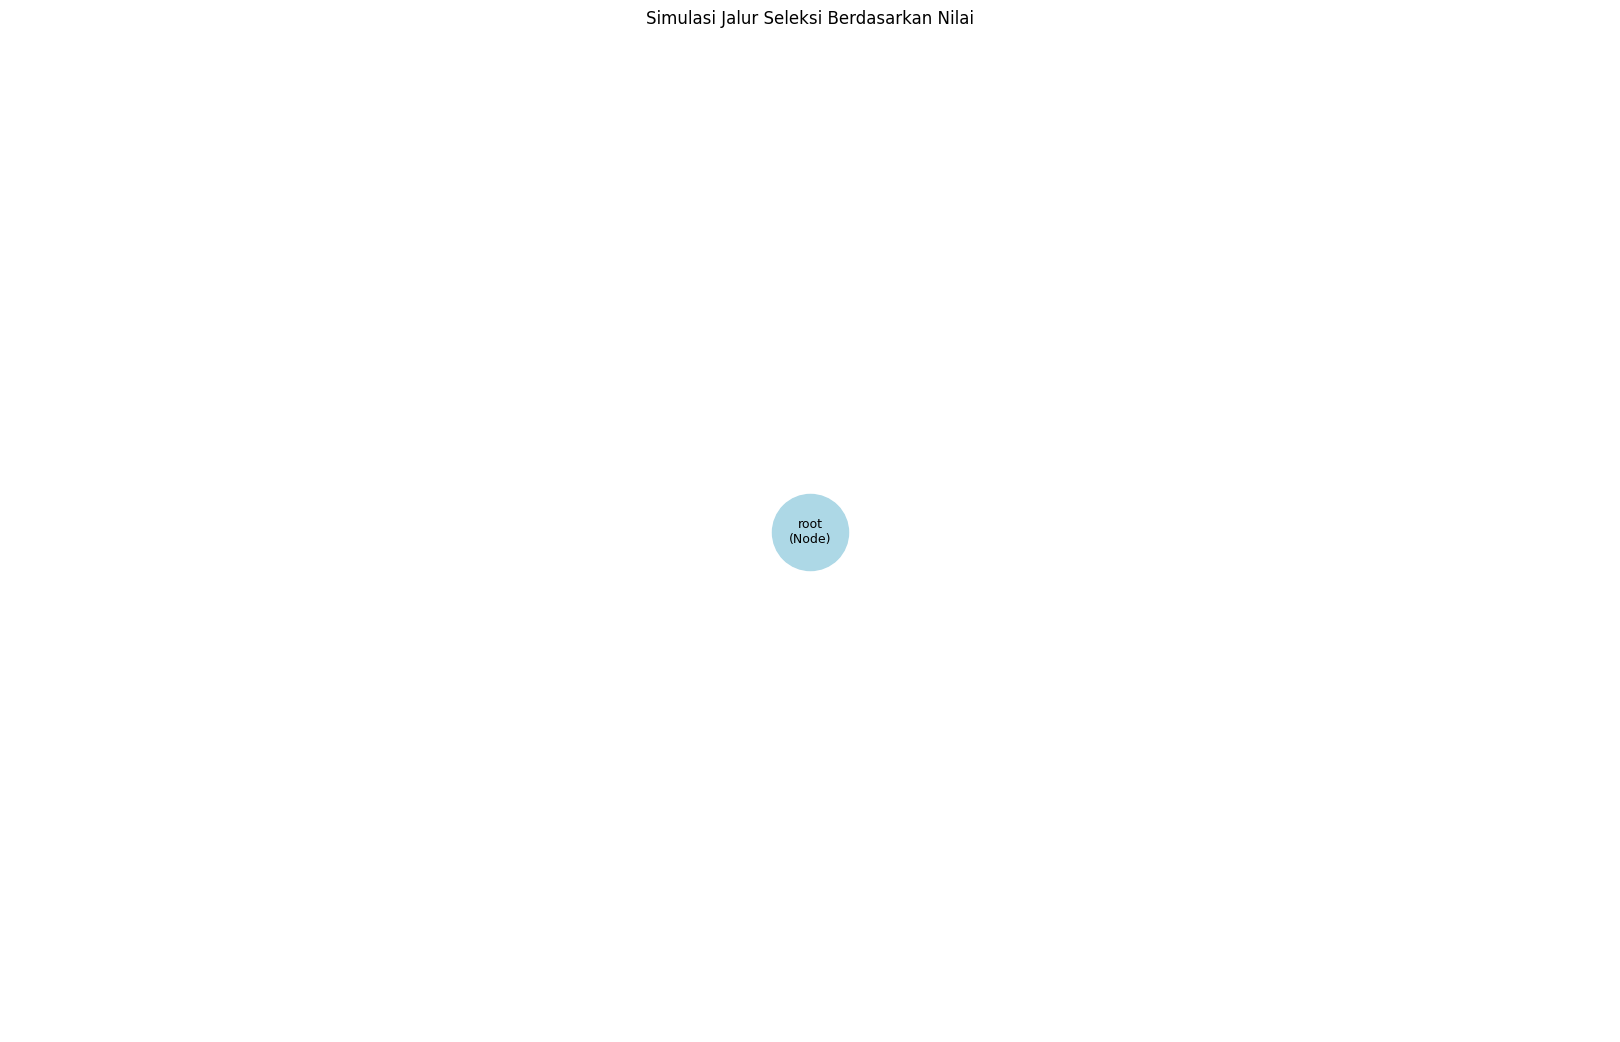


[SIMULASI JALUR TREE – PRIORITAS PU] None


In [205]:
def visualisasi_simulasi_tree(root, skor_LP, skor_LB, skor_PU):
    import networkx as nx
    import matplotlib.pyplot as plt

    G = nx.DiGraph()
    node_labels = {}
    highlight_edges = []

    def traverse(node, parent_id=None, node_id=0):
        node_label = f"{node.nama}\n({node.jurusan if node.jurusan else 'Node'})"
        G.add_node(node_id)
        node_labels[node_id] = node_label
        if parent_id is not None:
            G.add_edge(parent_id, node_id)

        next_id = node_id + 1
        found = False
        for anak in node.anak:
            if anak.kondisi is None or anak.kondisi(skor_LP, skor_LB, skor_PU):
                highlight_edges.append((node_id, next_id))
                temp_next, temp_found = traverse(anak, node_id, next_id)
                next_id = temp_next
                found = True
        return next_id, found

    traverse(root)

    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(16, 10))
    nx.draw(G, pos, with_labels=True, labels=node_labels,
            node_size=3000, node_color='lightblue', font_size=9,
            edge_color='gray')
    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges,
                               edge_color='red', width=2)
    plt.title("Simulasi Jalur Seleksi Berdasarkan Nilai")
    plt.show()

# print("\n[SIMULASI JALUR TREE – PRIORITAS LP]")

tree_lp = build_treenode_DT(sda1, 'LP')
tree_pu = build_treenode_DT(sda1, 'PU')
tree_lb = build_treenode_DT(sda1, 'LB')
# visualisasi_simulasi_tree(tree_lp, skor_LP, skor_LB, skor_PU)
# visualisasi_simulasi_tree(tree_lb, skor_LP, skor_LB, skor_PU)
# visualisasi_simulasi_tree(tree_pu, skor_LP, skor_LB, skor_PU)
print("\n[SIMULASI JALUR TREE – PRIORITAS LP]",visualisasi_simulasi_tree(tree_lp, skor_LP, skor_LB, skor_PU))
print("\n[SIMULASI JALUR TREE – PRIORITAS LB]",visualisasi_simulasi_tree(tree_lb, skor_LP, skor_LB, skor_PU))
print("\n[SIMULASI JALUR TREE – PRIORITAS PU]",visualisasi_simulasi_tree(tree_pu, skor_LP, skor_LB, skor_PU))

In [206]:
# POHON TREE DIAGRAM
class TreeNode:
    def __init__(self, nama='', kondisi=None, jurusan=None):
        self.nama = nama
        self.kondisi = kondisi
        self.jurusan = jurusan
        self.anak = []

    def tambah_anak(self, node):
        self.anak.append(node)

    def print_tree(self, prefix=''):
        if self.kondisi:
            print(f"{prefix}├── {self.kondisi}")
        elif self.jurusan:
            print(f"{prefix}└───> Jurusan [{self.jurusan}] direkomendasikan (True)")
        else:
            print(f"{prefix}{self.nama}")
        for i, anak in enumerate(self.anak):
            if i == len(self.anak) - 1:
                anak.print_tree(prefix + "    ")
            else:
                anak.print_tree(prefix + "│   ")


def build_tree_keputusan():
    root = TreeNode("root")

    # === LP ===
    node_LP = TreeNode("Cek Prioritas LP")
    root.tambah_anak(node_LP)

    # LP Posisi 1
    lp1 = TreeNode(kondisi="posisi_LP_jurusan == 1 DAN skor_LP_pengguna >= 650:")
    lb1 = TreeNode("Cek Prioritas LB")
    lb1.tambah_anak(TreeNode(kondisi="JIKA posisi_LB_jurusan == 2 DAN skor_LB_pengguna >= 600:"))
    lb1.anak[-1].tambah_anak(TreeNode(jurusan='A'))
    lb1.tambah_anak(TreeNode(kondisi="posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 600:"))
    lb1.anak[-1].tambah_anak(TreeNode(jurusan='B'))
    lp1.tambah_anak(lb1)
    node_LP.tambah_anak(lp1)

    # LP Posisi 2
    lp2 = TreeNode(kondisi="posisi_LP_jurusan == 2 DAN (500 <= skor_LP_pengguna < 650):")
    lb2 = TreeNode("Cek Prioritas LB")
    lb2.tambah_anak(TreeNode(kondisi="JIKA posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 650:"))
    lb2.anak[-1].tambah_anak(TreeNode(jurusan='C'))
    lb2.tambah_anak(TreeNode(kondisi="posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 650:"))
    lb2.anak[-1].tambah_anak(TreeNode(jurusan='D'))
    lp2.tambah_anak(lb2)
    node_LP.tambah_anak(lp2)

    # LP Posisi 3
    lp3 = TreeNode(kondisi="posisi_LP_jurusan == 3 DAN skor_LP_pengguna < 500:")
    lb3 = TreeNode("Cek Prioritas LB")
    lb3.tambah_anak(TreeNode(kondisi="JIKA posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 600:"))
    lb3.anak[-1].tambah_anak(TreeNode(jurusan='E'))
    lb3.tambah_anak(TreeNode(kondisi="posisi_LB_jurusan == 2 DAN skor_LB_pengguna < 600:"))
    lb3.anak[-1].tambah_anak(TreeNode(jurusan='F'))
    lp3.tambah_anak(lb3)
    node_LP.tambah_anak(lp3)

    # === LB ===
    node_LB = TreeNode("Cek Prioritas LB")
    root.tambah_anak(node_LB)

    lbp1 = TreeNode(kondisi="posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 650:")
    lp_lanjut1 = TreeNode("Cek Prioritas LP")
    lp_lanjut1.tambah_anak(TreeNode(kondisi="JIKA posisi_LP_jurusan == 2 DAN skor_LP_pengguna >= 600:"))
    lp_lanjut1.anak[-1].tambah_anak(TreeNode(jurusan='G'))
    lp_lanjut1.tambah_anak(TreeNode(kondisi="posisi_LP_jurusan == 3 DAN skor_LP_pengguna < 600:"))
    lp_lanjut1.anak[-1].tambah_anak(TreeNode(jurusan='H'))
    lbp1.tambah_anak(lp_lanjut1)
    node_LB.tambah_anak(lbp1)

    lbp2 = TreeNode(kondisi="posisi_LB_jurusan == 2 DAN (500 <= skor_LB_pengguna < 650):")
    lp_lanjut2 = TreeNode("Cek Prioritas LP")
    lp_lanjut2.tambah_anak(TreeNode(kondisi="JIKA posisi_LP_jurusan == 1 DAN skor_LP_pengguna >= 650:"))
    lp_lanjut2.anak[-1].tambah_anak(TreeNode(jurusan='I'))
    lp_lanjut2.tambah_anak(TreeNode(kondisi="posisi_LP_jurusan == 3 DAN skor_LP_pengguna < 650:"))
    lp_lanjut2.anak[-1].tambah_anak(TreeNode(jurusan='J'))
    lbp2.tambah_anak(lp_lanjut2)
    node_LB.tambah_anak(lbp2)

    lbp3 = TreeNode(kondisi="posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 500:")
    lp_lanjut3 = TreeNode("Cek Prioritas LP")
    lp_lanjut3.tambah_anak(TreeNode(kondisi="JIKA posisi_LP_jurusan == 1 DAN skor_LP_pengguna >= 600:"))
    lp_lanjut3.anak[-1].tambah_anak(TreeNode(jurusan='K'))
    lp_lanjut3.tambah_anak(TreeNode(kondisi="posisi_LP_jurusan == 2 DAN skor_LP_pengguna < 600:"))
    lp_lanjut3.anak[-1].tambah_anak(TreeNode(jurusan='L'))
    lbp3.tambah_anak(lp_lanjut3)
    node_LB.tambah_anak(lbp3)

    # === PU ===
    node_PU = TreeNode("Cek Prioritas PU")
    root.tambah_anak(node_PU)

    pu1 = TreeNode(kondisi="posisi_PU_jurusan == 1 DAN skor_PU_pengguna >= 650:")
    lb_pu1 = TreeNode("Cek Prioritas LB")
    lb_pu1.tambah_anak(TreeNode(kondisi="JIKA posisi_LB_jurusan == 2 DAN skor_LB_pengguna >= 600:"))
    lb_pu1.anak[-1].tambah_anak(TreeNode(jurusan='M'))
    lb_pu1.tambah_anak(TreeNode(kondisi="posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 600:"))
    lb_pu1.anak[-1].tambah_anak(TreeNode(jurusan='N'))
    pu1.tambah_anak(lb_pu1)
    node_PU.tambah_anak(pu1)

    pu2 = TreeNode(kondisi="posisi_PU_jurusan == 2 DAN (500 <= skor_PU_pengguna < 650):")
    lb_pu2 = TreeNode("Cek Prioritas LB")
    lb_pu2.tambah_anak(TreeNode(kondisi="JIKA posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 650:"))
    lb_pu2.anak[-1].tambah_anak(TreeNode(jurusan='O'))
    lb_pu2.tambah_anak(TreeNode(kondisi="posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 650:"))
    lb_pu2.anak[-1].tambah_anak(TreeNode(jurusan='P'))
    pu2.tambah_anak(lb_pu2)
    node_PU.tambah_anak(pu2)

    pu3 = TreeNode(kondisi="posisi_PU_jurusan == 3 DAN skor_PU_pengguna < 500:")
    lb_pu3 = TreeNode("Cek Prioritas LB")
    lb_pu3.tambah_anak(TreeNode(kondisi="JIKA posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 600:"))
    lb_pu3.anak[-1].tambah_anak(TreeNode(jurusan='Q'))
    lb_pu3.tambah_anak(TreeNode(kondisi="posisi_LB_jurusan == 2 DAN skor_LB_pengguna < 600:"))
    lb_pu3.anak[-1].tambah_anak(TreeNode(jurusan='R'))
    pu3.tambah_anak(lb_pu3)
    node_PU.tambah_anak(pu3)

    return root


# Cetak struktur pohon
if __name__ == "__main__":
    tree = build_tree_keputusan()
    tree.print_tree()


root
│   Cek Prioritas LP
│   │   ├── posisi_LP_jurusan == 1 DAN skor_LP_pengguna >= 650:
│   │       Cek Prioritas LB
│   │       │   ├── JIKA posisi_LB_jurusan == 2 DAN skor_LB_pengguna >= 600:
│   │       │       └───> Jurusan [A] direkomendasikan (True)
│   │           ├── posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 600:
│   │               └───> Jurusan [B] direkomendasikan (True)
│   │   ├── posisi_LP_jurusan == 2 DAN (500 <= skor_LP_pengguna < 650):
│   │       Cek Prioritas LB
│   │       │   ├── JIKA posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 650:
│   │       │       └───> Jurusan [C] direkomendasikan (True)
│   │           ├── posisi_LB_jurusan == 3 DAN skor_LB_pengguna < 650:
│   │               └───> Jurusan [D] direkomendasikan (True)
│       ├── posisi_LP_jurusan == 3 DAN skor_LP_pengguna < 500:
│           Cek Prioritas LB
│           │   ├── JIKA posisi_LB_jurusan == 1 DAN skor_LB_pengguna >= 600:
│           │       └───> Jurusan [E] direkomendasikan (True)
│    